In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguin_iter = pd.read_csv('penguins_lter.csv')

In [3]:
penguins = pd.read_csv('penguins_size.csv')

In [4]:
penguin_iter.head(5)

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
3     NaN                NaN                NaN   
4  FEMALE            8.76651          -25.32426   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
3              Adult not sampled.  
4                             NaN

In [5]:
#drop individual specific columns
penguin_iter.drop(['Sample Number','studyName','Individual ID','Region','Stage'], axis=1, inplace=True)

In [6]:
penguin_iter.columns

Index(['Species', 'Island', 'Clutch Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'Comments'],
      dtype='object')

In [7]:
penguin_iter.rename(columns={'Culmen Length (mm)':'Culmen_Length','Culmen Depth (mm)':'Culmen_Depth','Flipper Length (mm)':'Flipper_Length'}, inplace=True)

In [8]:
penguin_iter.rename(columns={'Delta 15 N (o/oo)':'Delta_15','Delta 13 C (o/oo)':'Delta_13'}, inplace=True)

In [9]:
penguin_iter.rename(columns={'Clutch Completion':'Clutch_Completion','Date Egg':'Date_Egg','Body Mass (g)':'Body_Mass'}, inplace=True)

In [10]:
penguin_iter.columns

Index(['Species', 'Island', 'Clutch_Completion', 'Date_Egg', 'Culmen_Length',
       'Culmen_Depth', 'Flipper_Length', 'Body_Mass', 'Sex', 'Delta_15',
       'Delta_13', 'Comments'],
      dtype='object')

In [11]:
penguin_iter['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [12]:
#Replace Species Value
penguin_iter.replace({'Species':{'Adelie Penguin (Pygoscelis adeliae)':'Adelie Penguin','Chinstrap penguin (Pygoscelis antarctica)':'Chinstrap penguin'}}, inplace=True)

In [13]:
penguin_iter.replace({'Species':{'Gentoo penguin (Pygoscelis papua)':'Gentoo penguin'}},inplace=True)

In [14]:
penguin_iter['Species'].unique()

array(['Adelie Penguin', 'Chinstrap penguin', 'Gentoo penguin'],
      dtype=object)

<AxesSubplot:>

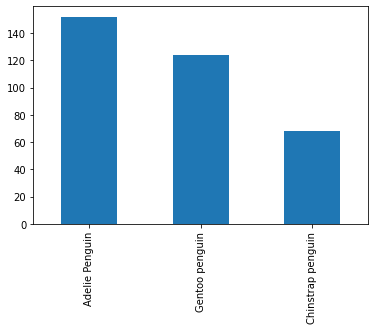

In [15]:
penguin_iter['Species'].value_counts().plot(kind='bar')

In [16]:
penguin_iter.isnull().sum()

Species                0
Island                 0
Clutch_Completion      0
Date_Egg               0
Culmen_Length          2
Culmen_Depth           2
Flipper_Length         2
Body_Mass              2
Sex                   10
Delta_15              14
Delta_13              13
Comments             318
dtype: int64

<AxesSubplot:xlabel='Species', ylabel='Flipper_Length'>

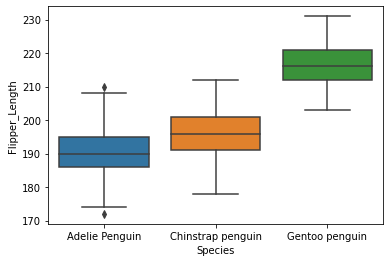

In [17]:
sns.boxplot(x='Species', y='Flipper_Length', data=penguin_iter)

<AxesSubplot:xlabel='Species', ylabel='Culmen_Depth'>

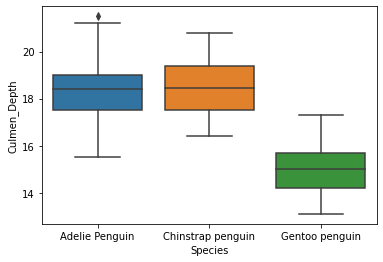

In [18]:
sns.boxplot(x='Species', y='Culmen_Depth', data=penguin_iter)

<AxesSubplot:xlabel='Species', ylabel='Culmen_Length'>

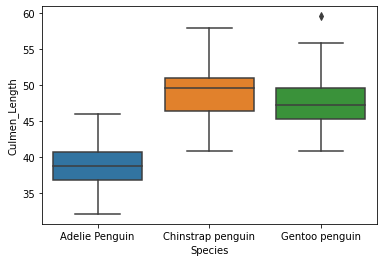

In [19]:
sns.boxplot(x='Species', y='Culmen_Length', data=penguin_iter)

<AxesSubplot:xlabel='Species', ylabel='Body_Mass'>

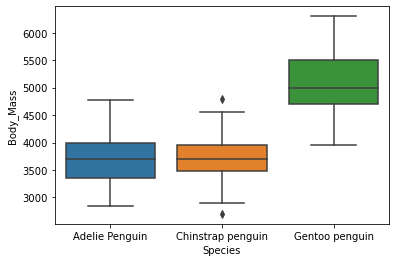

In [20]:
sns.boxplot(x='Species', y='Body_Mass', data=penguin_iter)

### Fill null values

In [21]:
flt = (penguin_iter['Species']=='Adelie Penguin')

In [22]:
# replace null values in Culmen Depth with species Adelie Penguin specific with corresponding medians
penguin_iter.loc[flt,'Culmen_Depth'] = penguin_iter.loc[flt,'Culmen_Depth'].fillna(penguin_iter.loc[flt,'Culmen_Depth'].median())
penguin_iter.loc[flt,'Culmen_Length'] = penguin_iter.loc[flt,'Culmen_Length'].fillna(penguin_iter.loc[flt,'Culmen_Length'].median())
penguin_iter.loc[flt,'Flipper_Length'] = penguin_iter.loc[flt,'Flipper_Length'].fillna(penguin_iter.loc[flt,'Flipper_Length'].median())
penguin_iter.loc[flt,'Body_Mass'] = penguin_iter.loc[flt,'Body_Mass'].fillna(penguin_iter.loc[flt,'Body_Mass'].median())
penguin_iter.loc[flt,'Delta_15'] = penguin_iter.loc[flt,'Delta_15'].fillna(penguin_iter.loc[flt,'Delta_15'].median())
penguin_iter.loc[flt,'Delta_13'] = penguin_iter.loc[flt,'Delta_13'].fillna(penguin_iter.loc[flt,'Delta_13'].median())


In [23]:
# replace null values in Culmen Depth with species Gentoo penguin specific with corresponding medians
flt = (penguin_iter['Species']=='Gentoo penguin')
penguin_iter.loc[flt,'Culmen_Depth'] = penguin_iter.loc[flt,'Culmen_Depth'].fillna(penguin_iter.loc[flt,'Culmen_Depth'].median())
penguin_iter.loc[flt,'Culmen_Length'] = penguin_iter.loc[flt,'Culmen_Length'].fillna(penguin_iter.loc[flt,'Culmen_Length'].median())
penguin_iter.loc[flt,'Flipper_Length'] = penguin_iter.loc[flt,'Flipper_Length'].fillna(penguin_iter.loc[flt,'Flipper_Length'].median())
penguin_iter.loc[flt,'Body_Mass'] = penguin_iter.loc[flt,'Body_Mass'].fillna(penguin_iter.loc[flt,'Body_Mass'].median())
penguin_iter.loc[flt,'Delta_15'] = penguin_iter.loc[flt,'Delta_15'].fillna(penguin_iter.loc[flt,'Delta_15'].median())
penguin_iter.loc[flt,'Delta_13'] = penguin_iter.loc[flt,'Delta_13'].fillna(penguin_iter.loc[flt,'Delta_13'].median())


In [24]:
flt = (penguin_iter['Species']=='Chinstrap penguin')
penguin_iter.loc[flt,'Delta_15'] = penguin_iter.loc[flt,'Delta_15'].fillna(penguin_iter.loc[flt,'Delta_15'].median())

In [25]:
penguin_iter.isnull().sum()

Species                0
Island                 0
Clutch_Completion      0
Date_Egg               0
Culmen_Length          0
Culmen_Depth           0
Flipper_Length         0
Body_Mass              0
Sex                   10
Delta_15               0
Delta_13               0
Comments             318
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Body_Mass'>

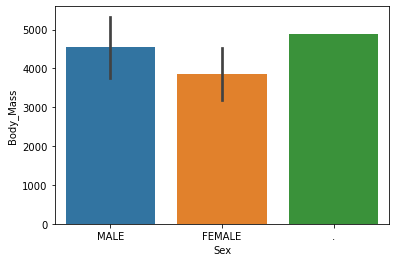

In [26]:
sns.barplot(data=penguin_iter, x= 'Sex', y='Body_Mass', estimator=np.mean, ci='sd')

<AxesSubplot:xlabel='Sex', ylabel='Body_Mass'>

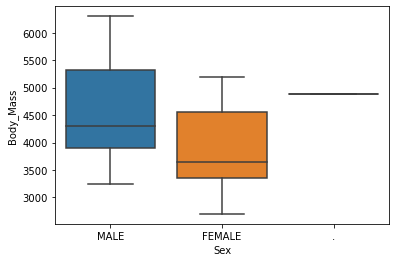

In [27]:
sns.boxplot(x='Sex', y='Body_Mass', data=penguin_iter)

<AxesSubplot:xlabel='Sex', ylabel='Culmen_Depth'>

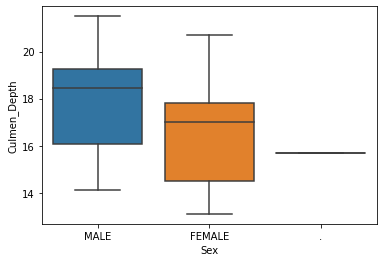

In [28]:
sns.boxplot(x='Sex', y='Culmen_Depth', data=penguin_iter)

<AxesSubplot:xlabel='Sex', ylabel='Culmen_Length'>

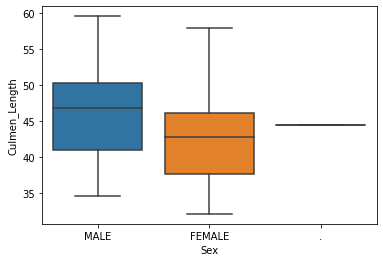

In [29]:
sns.boxplot(x='Sex', y='Culmen_Length', data=penguin_iter)

In [30]:
penguin_iter['Sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [31]:
penguin_iter.replace({'Sex':{'.':np.NaN}}, inplace=True)

In [32]:
penguin_iter['Sex'].value_counts()

MALE      168
FEMALE    165
Name: Sex, dtype: int64

In [ ]:
# fill null values in 'Sex' column

In [33]:
male = float(penguin_iter[penguin_iter['Sex']=='MALE']['Body_Mass'].median()) 
female = float(penguin_iter[penguin_iter['Sex']=='FEMALE']['Body_Mass'].median())
male , female
#we can use median value to replace missing values in sex column

(4300.0, 3650.0)

In [34]:
penguin_iter.loc[penguin_iter['Body_Mass']<male,'Sex'] = penguin_iter.loc[penguin_iter['Body_Mass']<male,'Sex'].fillna('FEMALE')
penguin_iter.loc[penguin_iter['Body_Mass']>=male,'Sex'] = penguin_iter.loc[penguin_iter['Body_Mass']>=male]['Sex'].fillna('MALE')

In [35]:
penguin_iter['Sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

<AxesSubplot:>

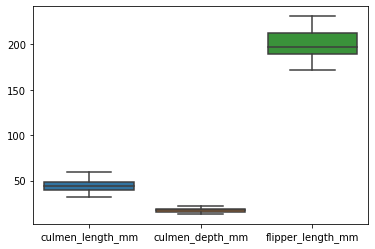

In [36]:
sns.boxplot(data=penguins[['culmen_length_mm','culmen_depth_mm','flipper_length_mm']])

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

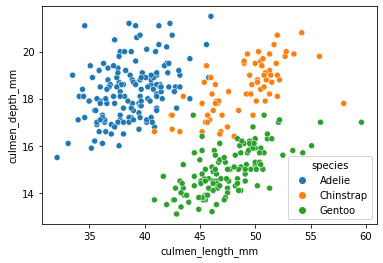

In [37]:

sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=penguins, hue= 'species' )

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

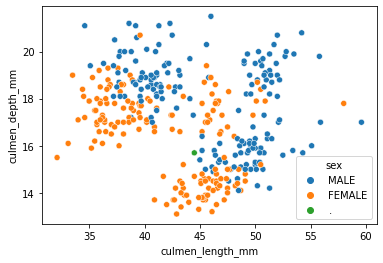

In [64]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=penguins, hue='sex' )

<AxesSubplot:xlabel='Island', ylabel='count'>

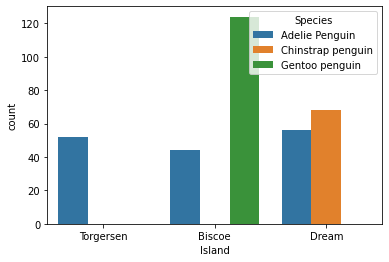

In [38]:
sns.countplot(x='Island', data=penguin_iter, hue='Species' )

In [39]:
corr = penguin_iter.corr()

In [40]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<AxesSubplot:>

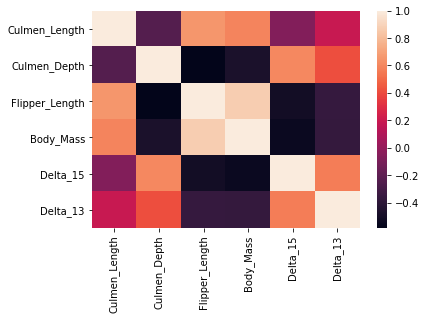

In [41]:
sns.heatmap(corr)

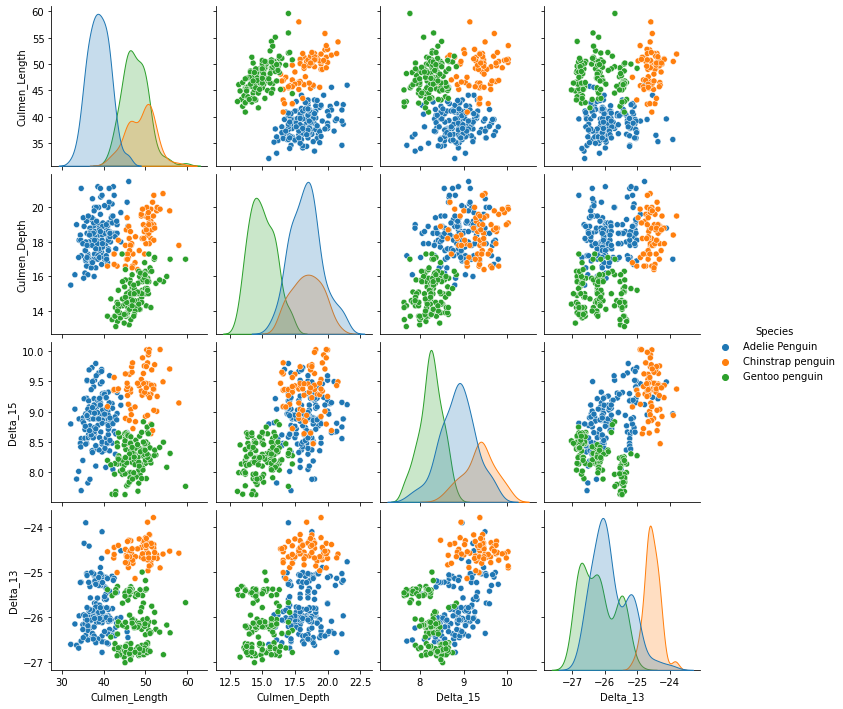

In [85]:

sns.pairplot(data=penguin_iter[['Culmen_Length','Culmen_Depth','Delta_15','Delta_13','Species']],hue='Species')

In [98]:
penguin_iter.head(5)

Species     Island  Culmen_Length  Culmen_Depth  Flipper_Length  \
0  Adelie Penguin  Torgersen           39.1          18.7           181.0   
1  Adelie Penguin  Torgersen           39.5          17.4           186.0   
2  Adelie Penguin  Torgersen           40.3          18.0           195.0   
3  Adelie Penguin  Torgersen           38.8          18.4           190.0   
4  Adelie Penguin  Torgersen           36.7          19.3           193.0   

   Body_Mass     Sex  Delta_15  Delta_13  
0     3750.0    MALE   8.88098 -25.97696  
1     3800.0  FEMALE   8.94956 -24.69454  
2     3250.0  FEMALE   8.36821 -25.33302  
3     3700.0  FEMALE   8.88098 -25.97696  
4     3450.0  FEMALE   8.76651 -25.32426

### feature selection
### eliminating those features which are not useful for prediction

<AxesSubplot:xlabel='Clutch_Completion', ylabel='count'>

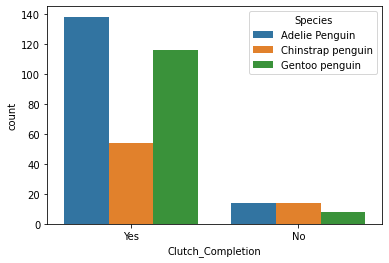

In [45]:
sns.countplot(data=penguin_iter, x='Clutch_Completion', hue='Species')

In [46]:
#columns 'Clutch_Completion' does't give any useful information about species so we can drop it

In [48]:
penguin_iter.drop('Clutch_Completion', axis=1, inplace=True)

<AxesSubplot:xlabel='Species', ylabel='Date_Egg'>

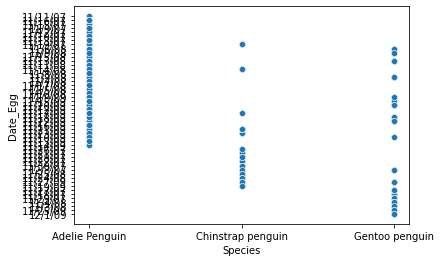

In [52]:
sns.scatterplot(x='Species', y='Date_Egg', data=penguin_iter)

In [ ]:
#value of Date_egg is mostly overlapping among all the species dats y it does't show any significant information about species
#so we can drop this also

In [53]:
penguin_iter.drop('Date_Egg', axis=1, inplace=True)

In [67]:
penguin_iter.drop('Comments', axis=1, inplace=True)

<AxesSubplot:ylabel='Species'>

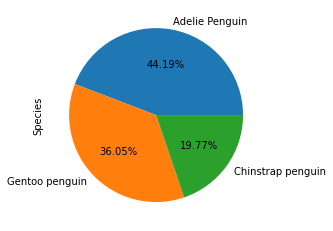

In [68]:
penguin_iter['Species'].value_counts().plot(kind='pie',autopct="%.2f%%")

In [99]:
penguin_iter.head(5)

Species     Island  Culmen_Length  Culmen_Depth  Flipper_Length  \
0  Adelie Penguin  Torgersen           39.1          18.7           181.0   
1  Adelie Penguin  Torgersen           39.5          17.4           186.0   
2  Adelie Penguin  Torgersen           40.3          18.0           195.0   
3  Adelie Penguin  Torgersen           38.8          18.4           190.0   
4  Adelie Penguin  Torgersen           36.7          19.3           193.0   

   Body_Mass     Sex  Delta_15  Delta_13  
0     3750.0    MALE   8.88098 -25.97696  
1     3800.0  FEMALE   8.94956 -24.69454  
2     3250.0  FEMALE   8.36821 -25.33302  
3     3700.0  FEMALE   8.88098 -25.97696  
4     3450.0  FEMALE   8.76651 -25.32426

In [87]:
from sklearn.preprocessing import LabelEncoder

In [86]:
X = penguin_iter.drop('Species', axis=1)
X=pd.get_dummies(X)
X

Culmen_Length  Culmen_Depth  Flipper_Length  Body_Mass  Delta_15  \
0             39.1          18.7           181.0     3750.0   8.88098   
1             39.5          17.4           186.0     3800.0   8.94956   
2             40.3          18.0           195.0     3250.0   8.36821   
3             38.8          18.4           190.0     3700.0   8.88098   
4             36.7          19.3           193.0     3450.0   8.76651   
..             ...           ...             ...        ...       ...   
339           47.3          15.0           216.0     5000.0   8.25117   
340           46.8          14.3           215.0     4850.0   8.41151   
341           50.4          15.7           222.0     5750.0   8.30166   
342           45.2          14.8           212.0     5200.0   8.24246   
343           49.9          16.1           213.0     5400.0   8.36390   

      Delta_13  Island_Biscoe  Island_Dream  Island_Torgersen  Sex_FEMALE  \
0   -25.976960              0             0                 1           0   
1   -24.694540              0             0                 1           1   
2   -25.333020              0             0                 1           1   
3   -25.976960              0             0                 1           1   
4   -25.324260              0             0                 1           1   
..         ...            ...           ...               ...         ...   
339 -26.221575              1             0                 0           0   
340 -26.138320              1             0                 0           1   
341 -26.041170              1             0                 0           0   
342 -26.119690              1             0                 0           1   
343 -26.155310              1             0                 0           0   

     Sex_MALE  
0           1  
1           0  
2           0  
3           0  
4           0  
..        ...  
339         1  
340         0  
341         1  
342         0  
343         1  

[344 rows x 11 columns]

In [89]:
y = penguin_iter['Species']
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [79]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
model = DecisionTreeClassifier()

In [93]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [95]:
y_pred = model.predict(X_test)

In [96]:
np.sum(y_pred!=y_test)

3